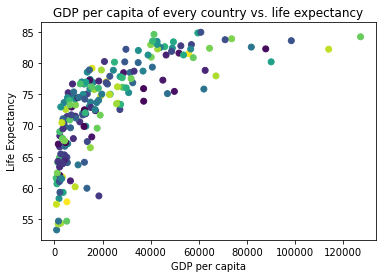

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
from sklearn import datasets
import os

dataFolder = "data-prob-1"
gdpFile = os.path.join(dataFolder, "gdp.csv")
lifeFile = os.path.join(dataFolder, "life-expectancy.csv")
popFile = os.path.join(dataFolder, "WPP2019_TotalPopulationBySex.csv")

gdpworldbank = pd.read_csv(gdpFile, index_col = False)
lifeExpectancy = pd.read_csv(lifeFile, index_col = False)
population = pd.read_csv(popFile, index_col = False)
population.loc[population['Location'] == 'China, Hong Kong SAR', 'Location'] = 'Hong Kong'
population.loc[population['Location'] == 'China, Macao SAR', 'Location'] = 'Macao'
population.loc[population['Location'] == 'Dem. People\'s Republic of Korea', 'Location'] = 'South Korea'

GDPRelevantYear = gdpworldbank[gdpworldbank["Year"] == 2019]
lifeRelevantYear = lifeExpectancy[lifeExpectancy["Year"] == 2019]
populationRelevantYear = population[population["Time"] == 2019]
GDPRelevantYear.reset_index(drop=True, inplace=True)
lifeRelevantYear.reset_index(drop=True, inplace=True)
populationRelevantYear.reset_index(drop=True, inplace=True)

def relateData(GDPData, lifeExpectancy):
    xData = []
    yData = []
    countryData = []

    entityDataGDP = GDPData.Entity
    entityDataLife = lifeExpectancy.Entity
    for i in range(len(GDPData)):
        for j in range(len(lifeExpectancy)):
            if entityDataGDP[i] == entityDataLife[j]:
                xData.append(GDPData.GDPPC[i])
                yData.append(lifeExpectancy.LifeExpectancy[j])
                countryData.append(entityDataGDP[i])
                break
    return pd.DataFrame({'Entity' : countryData, 'GDPPC' : xData, 'LifeExpectancy' : yData})


df = relateData(GDPRelevantYear, lifeRelevantYear)
N = len(df['LifeExpectancy'])
colors = np.random.rand(N)
plt.scatter(df['GDPPC'], df['LifeExpectancy'], c=colors)
plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")
plt.title("GDP per capita of every country vs. life expectancy")
plt.show()

a) We decide to scatter plot data which has some correlation to one another, that is, if year and location is the same we scatter plot the given life expectancy vs. gdp per capita data. The data clearing we did for this part was that we decided to only look at the year 2019 (which was the last common year, hence most relevant). The reason for only looking at a certain year is because the dynamic economic growth of countries would require a 3D graph in order to present a good visualization. One assumption that has been made is that the population of North and South Korea are included in that of the Dem. People's Republic of Korea, which most definitely will result in an overestimation of South Korea's GDP. This assumption is based on the fact that diplomatic relations might play a role in how populations are measured. Certain disputed regions in proximity to China were named differently by different datasets as well, probably also due to diplomatic relations.

b) We can notice that generally higher GDP per capita results in a longer expected life time, which is expected. Furthermore we can see that living in different countries affects the expected life time, which is the explanation of the logarithmic curvature (big difference in the lower region of GDP per capita). Furthermore after a certain GDP/capita we can see that the expected life time does not increase alot. This is because the majority of the population in that country can afford medical help and other tools to increase their lifespan but only up to a limit. Therefore the results seems reasonable.

c) Just like in question (a) we decided to only have data from the year 2019 when doing the scatter plots. Furthermore we also didn't consider the world GDP in question (f) since this results in a badly scaled figure, where almost every country's GDP appears to have a GDP of 0. We also had to rename certain regions to match between the data sets, see (a).


In [12]:
yStats = df.LifeExpectancy.describe()
mean = yStats[1]
std = yStats[2]
lifeExpBound = mean + std
print("Life expectancy lower bound :", lifeExpBound, '\n')

upperLifeDF = df.loc[df['LifeExpectancy'] >= lifeExpBound]
upperLifeDF.reset_index(drop=True, inplace=True)


Life expectancy lower bound : 80.42308448229288 



d) We know from the normal distribution that the lower 84% of the distribution is the set which contains the countries which is not above one standard deviation of the distribution, hence we can sort the countries according to life expectancy and conclude which of the upper most 16% of countries is above one standard deviation. The countries which have this high life expectancy are the following:

Australia, Austria, Belgium, Bermuda, Canada, Cayman Islands, Cyprus, Denmark, Finland, France, Germany, Greece, Hong Kong, Iceland, Ireland, Israel, Italy, Japan, Luxembourg, Macao, Malta, Netherlands, New Zealand, Norway, Portugal, San Marino, Singapore, Slovenia, South Korea, Spain, Sweden, Switzerland, United Kingdom

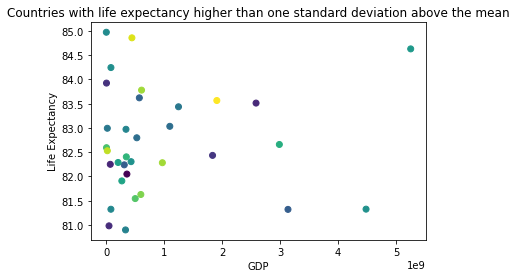

,Entity,GDPPC,LifeExpectancy,GDP
25,San Marino,60847.106761,84.972,2.060526e+06
5,Cayman Islands,73633.701628,83.924,4.782362e+06
3,Bermuda,81804.265677,82.593,5.113421e+06
13,Iceland,56913.956847,82.993,1.929594e+07
20,Malta,43950.588053,82.530,1.935483e+07


In [13]:
popUpperLifeDF = pd.DataFrame({})

for entity in upperLifeDF.Entity:
    popUpperLifeDF = pd.concat([popUpperLifeDF, populationRelevantYear.loc[populationRelevantYear['Location'] == entity]])

popUpperLifeDF.reset_index(drop=True, inplace=True)

upperLifeDF = upperLifeDF.assign(GDP=upperLifeDF['GDPPC']*popUpperLifeDF['PopTotal']) 

N2 = len(upperLifeDF.GDP)
colors2 = np.random.rand(N2)
plt.scatter(upperLifeDF.GDP, upperLifeDF.LifeExpectancy, c=colors2)
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.title("Countries with life expectancy higher than one standard deviation above the mean")
plt.show()
upperLifeDF.nsmallest(5, 'GDP')


e) When considering the top 16% as high life expectancy we saw that the following countries had a low GDP, provided by the table above: San Marino, Cayman Islands, Bermuda, Iceland, Malta.

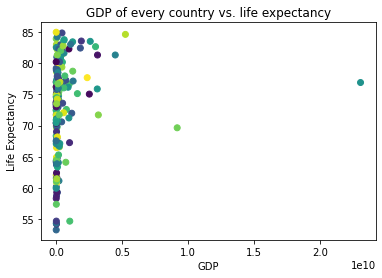

In [14]:
def findGDP(GDPData,countries,populationData, lifeExpectancyData):
    population = []
    GDPPC = []
    lifeExpectancy = []
    theCountry = []

    entities = countries
    entityPopulation = populationData.Location
    for i in range(len(countries)):
        for j in range(len(populationData)):
            if entities[i] == entityPopulation[j]:
                population.append(populationData.PopTotal[j])
                GDPPC.append(GDPData[i])
                lifeExpectancy.append(lifeExpectancyData[i])
                theCountry.append(entities[i])
    GDP = np.multiply(population, GDPPC)
    return(GDP, lifeExpectancy, theCountry)

GDPAndExpectancyByCountry = findGDP(df.GDPPC, df.Entity, populationRelevantYear, df.LifeExpectancy)
GDPByCountry = GDPAndExpectancyByCountry[0]

GDPByCountryMinusWorld = np.delete(GDPByCountry, 173)
lifeExpectancyByCountry = GDPAndExpectancyByCountry[1]
lifeExpectancyByCountry.pop(173)
theCountry = GDPAndExpectancyByCountry[2]

N3 = len(GDPByCountryMinusWorld)
colors3 = np.random.rand(N3)
plt.scatter(GDPByCountryMinusWorld, lifeExpectancyByCountry, c=colors3)
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.title("GDP of every country vs. life expectancy")
plt.show()


f) Not every strong economy has a high life expectancy as shown in the figure 3. The majoirty of strong economys has a lower life expectancy than 80.4, which we earlier defined as the limit for high life expectancy.

g) As shown in Figure 1, we can clearly notice that the majority of countries with high GDP per capita has a high life expectancy (above 80.4 years) with only Qatar having high GDP per capita but low life expectancy. If we compare with the last graph, where we plot gdp vs life expectancy, there is a clear difference. As answered in f) not every strong economy has a high life expectancy. This is because GDP is dependent on how many people that live in a country. This makes it so that the people might be poor, but the country might still have a strong economy. Generally areas of extreme poverty do not have good health care which results in relatively low local life expectancy. Furthermore, the number of poor people outweighs the number of rich people, hence these poor areas contribute more to the national life expectancy than the areas of rich people.